In [1]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

from datetime import datetime

import statsmodels.api as sm
import pylab as py

In [2]:
file = open('NetSense_network.pkl', 'rb')
# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Showing the pickled data:
The data  0  is :  1
The data  1  is :  2
The data  2  is :  3
The data  3  is :  4
The data  4  is :  5
The data  5  is :  6


In [3]:
data[6].nodes[75261]['hometown_1']

1

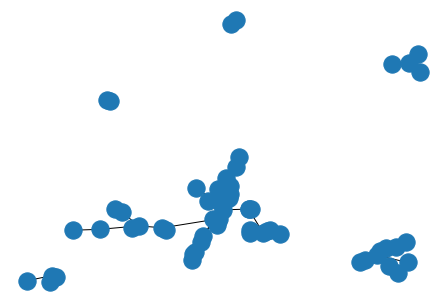

In [4]:
nx.draw(data[6])

In [5]:
data[1].nodes.data()

NodeDataView({75178: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 2, 'premaritalsex_': 3, 'euthanasia_': 3, 'deathpen_': 3, 'gaymarriage_': 3, 'marijuana_': 2, 'political_': 1, 'abortion_': 3, 'homosexual_': 3}, 30952: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 2, 'premaritalsex_': 2, 'euthanasia_': 2, 'deathpen_': 2, 'gaymarriage_': 1, 'marijuana_': 3, 'political_': 1, 'abortion_': 2, 'homosexual_': 2}, 13116: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 3, 'deathpen_': 3, 'gaymarriage_': 3, 'marijuana_': 3, 'political_': 3, 'abortion_': 3, 'homosexual_': 1}, 62555: {'age_1': 2, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 1, 'deathpen_': 1, 'gaymarriage_': 3, 'marijuana_': 2, 'political_': 3, 'abortion_': 3, 'homosexual_': 3}, 26999: {'age_1': 2, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 1, 'deathpen_': 2, 'gaymarri

In [6]:
#creating list of attributes
list_of_attributes = set([k for n in data[1].nodes for k in data[1].nodes[n].keys()])

#creating possible attribute values
attribute_values = dict((attribute, set() ) for attribute in list_of_attributes)

for sem in range(1,7):
    for node in data[sem].nodes():
        for attribute in list_of_attributes:
            attribute_values[attribute].add(data[sem].nodes[node][attribute])

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

{'age_1': {1, 2},
 'deathpen_': {1, 2, 3},
 'hometown_1': {1, 2, 3},
 'political_': {1, 2, 3},
 'homosexual_': {1, 2, 3},
 'marijuana_': {1, 2, 3},
 'gaymarriage_': {1, 2, 3},
 'ethnicity_1': {1, 2, 3, 4},
 'abortion_': {1, 2, 3},
 'euthanasia_': {1, 2, 3},
 'gender_1': {1, 2},
 'premaritalsex_': {1, 2, 3}}

In [7]:
#creating table of attribute values
attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    attributes[i] = np.zeros([len(data[i].nodes), len(list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(list_of_attributes):
            attributes[sem][i,j] = data[sem].nodes[node][attribute]

In [8]:
attributes

{1: array([[1., 3., 1., ..., 3., 2., 3.],
        [1., 2., 1., ..., 2., 2., 2.],
        [1., 3., 1., ..., 3., 1., 3.],
        ...,
        [2., 2., 1., ..., 2., 1., 3.],
        [2., 1., 3., ..., 2., 2., 1.],
        [2., 1., 1., ..., 3., 1., 3.]]),
 2: array([[2., 1., 3., ..., 3., 1., 1.],
        [2., 1., 1., ..., 1., 2., 1.],
        [1., 2., 1., ..., 3., 2., 3.],
        ...,
        [1., 2., 1., ..., 1., 2., 3.],
        [1., 3., 2., ..., 3., 1., 3.],
        [1., 1., 1., ..., 2., 2., 2.]]),
 3: array([[1., 1., 2., 2., 3., 1., 3., 1., 3., 3., 2., 3.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.],
        [2., 1., 2., 2., 1., 3., 2., 1., 1., 1., 2., 1.],
        [1., 3., 1., 3., 3., 3., 3., 3., 1., 3., 2., 3.],
        [2., 1., 1., 1., 3., 2., 3., 1., 3., 3., 1., 3.],
        [1., 1., 1., 2., 1., 1., 3., 2., 3., 3., 2., 1.],
        [1., 1., 2., 1., 3., 2., 3., 1., 1., 2., 1., 3.],
        [2., 1., 2., 3., 3., 1., 3., 1., 3., 2., 2., 3.],
        [1., 1., 1., 1., 3., 

In [9]:
import mca


In [10]:
df = pd.DataFrame(data=attributes[1], columns=attribute_values)
print(df)

    age_1  deathpen_  hometown_1  political_  homosexual_  marijuana_  \
0     1.0        3.0         1.0         1.0          3.0         2.0   
1     1.0        2.0         1.0         1.0          2.0         3.0   
2     1.0        3.0         1.0         3.0          1.0         3.0   
3     2.0        1.0         1.0         3.0          3.0         2.0   
4     2.0        2.0         1.0         2.0          3.0         1.0   
..    ...        ...         ...         ...          ...         ...   
93    1.0        3.0         2.0         1.0          1.0         1.0   
94    1.0        3.0         1.0         3.0          3.0         3.0   
95    2.0        2.0         1.0         2.0          1.0         1.0   
96    2.0        1.0         3.0         1.0          1.0         1.0   
97    2.0        1.0         1.0         2.0          3.0         3.0   

    gaymarriage_  ethnicity_1  abortion_  euthanasia_  gender_1  \
0            3.0          2.0        3.0          3.0   

In [11]:
mca_counts = mca.MCA(df, ncols = len(attribute_values))
# print(mca_counts.fs_r(1))
print(mca_counts.L)

[0 0 0 0 0 0 0 0 0 0 0 0]


# PCA
Trying simple PCA, although it is not recommended. To do it we need to remove categorical data first. 

In [12]:

ord_list_of_attributes = list_of_attributes - {'ethnicity_1', 'gender_1', 'hometown_1', 'age_1'}
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    ord_attributes[i] = np.zeros([len(data[i].nodes), len(ord_list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(ord_list_of_attributes):
            ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
print(ord_attributes)

{'deathpen_', 'political_', 'homosexual_', 'marijuana_', 'gaymarriage_', 'abortion_', 'euthanasia_', 'premaritalsex_'}
{1: array([[3., 1., 3., 2., 3., 3., 3., 3.],
       [2., 1., 2., 3., 1., 2., 2., 2.],
       [3., 3., 1., 3., 3., 3., 3., 3.],
       [1., 3., 3., 2., 3., 3., 1., 3.],
       [2., 2., 3., 1., 2., 3., 1., 3.],
       [1., 2., 1., 1., 1., 1., 3., 1.],
       [2., 1., 2., 1., 2., 1., 1., 1.],
       [2., 2., 1., 3., 2., 2., 2., 1.],
       [1., 2., 3., 2., 3., 3., 3., 3.],
       [1., 3., 3., 3., 3., 1., 1., 3.],
       [1., 2., 1., 2., 1., 1., 3., 1.],
       [1., 1., 1., 1., 2., 1., 1., 1.],
       [1., 1., 3., 3., 3., 1., 2., 3.],
       [1., 1., 2., 3., 1., 1., 1., 1.],
       [3., 3., 3., 3., 3., 1., 3., 3.],
       [1., 1., 2., 2., 1., 1., 3., 2.],
       [2., 1., 1., 2., 1., 1., 2., 3.],
       [3., 1., 1., 3., 1., 1., 3., 1.],
       [2., 3., 3., 3., 3., 3., 3., 2.],
       [1., 1., 1., 3., 3., 1., 3., 3.],
       [3., 1., 3., 3., 3., 3., 3., 3.],
       [1., 3., 

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(ord_attributes[1])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.47038187 0.11940998 0.10246659 0.08957861 0.07116288 0.06436994
 0.05160825 0.03102189]
[17.11639876  8.62397378  7.98873919  7.46946095  6.65754145  6.33182142
  5.66952482  4.39563096]


In [14]:
pca.components_

array([[-0.12955624, -0.3241474 , -0.48425964, -0.27084   , -0.39901144,
        -0.41745007, -0.24968005, -0.41769261],
       [ 0.65333018, -0.43714941, -0.09174305, -0.22128266, -0.2101619 ,
         0.07033197,  0.46844261,  0.23690543],
       [-0.07401475,  0.10379584, -0.28540519,  0.77893658, -0.30548031,
        -0.13639703,  0.42464514, -0.05748098],
       [-0.52764789, -0.37576774,  0.17738585, -0.16178306,  0.34976814,
        -0.2445525 ,  0.57800543, -0.08070223],
       [-0.08275739,  0.17894791, -0.10553723, -0.2090991 , -0.13087866,
         0.67667811,  0.29847934, -0.58494095],
       [-0.31818028,  0.476098  , -0.16015638, -0.41560726, -0.40466446,
        -0.06968337,  0.23693772,  0.49896288],
       [-0.37499853, -0.5095246 ,  0.27344745,  0.16193395, -0.46445726,
         0.41052265, -0.2217284 ,  0.25563998],
       [-0.15418497, -0.18315813, -0.72978919,  0.04570879,  0.42937486,
         0.33331801, -0.09702961,  0.32112321]])

# Checking correlation for PCA transformed variables

In [15]:
dcor_attributes = dict((i, 0) for i in range(1,7))

dcor_attributes = dict((j, np.array([np.sum(pca.components_*ord_attributes[j][i],1) for i in range(0,len(ord_attributes[j]))])) for j in range(1,7))

In [16]:
def get_transformed_attributes(agents, pca_comp = pca.components_):
    agents = np.array(agents)
    if not hasattr(agents,  "__len__"):
        agents = [agents]
    one_ag = False
    if hasattr(agents,  "shape"):
        if len(agents.shape) == 1:
            agents = [agents]
            one_ag = True
    
    transf = np.array([np.sum(pca.components_*agents[i],1) for i in range(0,len(agents))])
    
    if one_ag:
        transf = transf[0]
    return transf

In [17]:
get_transformed_attributes(np.ones(8))

array([-2.69263746,  0.46867315,  0.4485993 , -0.285294  ,  0.04089202,
       -0.15629314, -0.46916477, -0.03463704])

In [18]:
dcor_attributes[1].shape, 

((98, 8),)

In [19]:
spr_cor, spr_pv = stats.spearmanr(dcor_attributes[1], axis=0)

In [20]:
np.set_printoptions(precision=3)
print(spr_cor)
print(spr_pv)

[[ 1.    -0.032 -0.089  0.036 -0.048 -0.07   0.005 -0.057]
 [-0.032  1.    -0.042  0.039  0.013  0.058 -0.02  -0.021]
 [-0.089 -0.042  1.    -0.004  0.037 -0.019  0.073 -0.047]
 [ 0.036  0.039 -0.004  1.     0.042  0.033  0.022 -0.006]
 [-0.048  0.013  0.037  0.042  1.     0.115 -0.079 -0.045]
 [-0.07   0.058 -0.019  0.033  0.115  1.    -0.04  -0.003]
 [ 0.005 -0.02   0.073  0.022 -0.079 -0.04   1.     0.136]
 [-0.057 -0.021 -0.047 -0.006 -0.045 -0.003  0.136  1.   ]]
[[0.    0.751 0.385 0.727 0.636 0.491 0.959 0.577]
 [0.751 0.    0.682 0.707 0.9   0.568 0.847 0.839]
 [0.385 0.682 0.    0.967 0.717 0.852 0.472 0.645]
 [0.727 0.707 0.967 0.    0.68  0.749 0.829 0.955]
 [0.636 0.9   0.717 0.68  0.    0.26  0.441 0.659]
 [0.491 0.568 0.852 0.749 0.26  0.    0.693 0.975]
 [0.959 0.847 0.472 0.829 0.441 0.693 0.    0.183]
 [0.577 0.839 0.645 0.955 0.659 0.975 0.183 0.   ]]


Using PCA variables show that they are decorrelated. So maybe we can use them to calculate polarities, triads etc. 
But as to calc each new attribute we get all old attributes with certain coefficients, won't the distance just be sum of coefficients for given old attribute times this attribute value?

## Max difference of new attributes

In [21]:
def calc_distance(agent1, agent2, scale = 1):
    return np.sum(np.abs(agent1-agent2)) / len(agent1) / scale

def calc_distances(agents, scale = 1):
    N, A = agents.shape
    
    distances = np.zeros([N,N])
    
    for i in range(0,N):
        for j in range(i+1,N):
            distances[i,j] = calc_distance(agents[i], agents[j], scale)
            distances[j,i] = distances[i,j]
    return distances


In [22]:
max_dif = abs(np.sum([3,3,3,3,3,3,3,3] * pca.components_[0]) - np.sum(np.ones(8) * pca.components_[0]))/8
min_dif = 0
max_dif

0.6731593640729351

In [23]:
max_difs = [(np.sum(np.ones(8)*3 * pca.components_[i]) - np.sum(np.ones(8) * pca.components_[i]))/8 for i in range(0, len(pca.components_))]
max_difs

[-0.6731593640729351,
 0.11716828740273696,
 0.11214982538572354,
 -0.07132349966753532,
 0.010223005331998849,
 -0.0390732854047995,
 -0.11729119229619513,
 -0.008659260277375638]

In [24]:
sum(np.abs(max_difs))

1.1490477198393003

In [25]:
max_difs2 = [(np.sum(np.abs(np.ones(8)*3 * pca.components_[i])) - np.sum(np.abs(np.ones(8) * pca.components_[i])))/8 for i in range(0, len(pca.components_))]
max_difs2, sum(max_difs2)

([0.6731593640729351,
  0.5973368021543245,
  0.5415389513500892,
  0.6239032129798632,
  0.5668296735029916,
  0.6450725898637426,
  0.6680632035555417,
  0.5734216963252283],
 4.889325493804716)

In [26]:
import itertools

vals = [1, 3]

max_dif3 = 0
max_vals = []

repeat = 8

# agents2 = [np.ones(repeat)]
# agents2 = get_transformed_attributes(agents2)
for agent1 in itertools.product(vals, repeat = repeat):
    tr_agent1 = get_transformed_attributes(agent1)
#     for agent2 in agents2: 
    for agent2 in itertools.product(vals, repeat = repeat):
        tr_agent2 = get_transformed_attributes(agent2)
        dif = calc_distance(tr_agent1, tr_agent2)
        
        if dif > max_dif3:
            max_dif3 = dif
            max_vals = [agent1, agent2]
max_dif3, max_vals

(1.9498109791002045, [(1, 3, 1, 3, 3, 1, 3, 3), (3, 1, 3, 1, 1, 3, 1, 1)])

In [27]:
# def calc_max_dif()

In [28]:
calc_distance(get_transformed_attributes(np.ones(8)*3), get_transformed_attributes(np.ones(8)))

1.1490477198393003

In [29]:
get_transformed_attributes(agent1), agent1, get_transformed_attributes(max_vals[0])

(array([-8.078,  1.406,  1.346, -0.856,  0.123, -0.469, -1.407, -0.104]),
 (3, 3, 3, 3, 3, 3, 3, 3),
 array([-6.015,  0.142,  2.337,  0.334, -0.854,  0.627, -2.025,  0.997]))

In [30]:
sum(pca.components_[0]*2)/8, len(get_transformed_attributes(np.ones(8)*3))

(-0.6731593640729352, 8)

(array([0.157, 0.244, 0.487, 1.19 , 2.451, 3.277, 2.226, 0.785, 0.102,
        0.009]),
 array([0.   , 0.092, 0.183, 0.275, 0.366, 0.458, 0.549, 0.641, 0.732,
        0.824, 0.915]),
 <BarContainer object of 10 artists>)

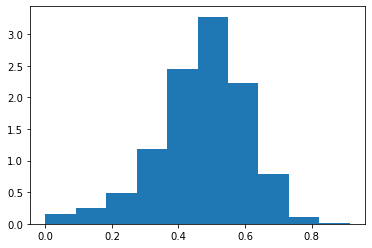

In [31]:
dists = calc_distances(dcor_attributes[1], max_dif3)

plt.hist(dists.flatten(), density=True)

In [32]:
np.where(np.max(dists) == dists), np.max(dists)

((array([53, 79, 94, 94]), array([94, 94, 53, 79])), 0.9150660566622943)

In [33]:
transf_max_vals = get_transformed_attributes(max_vals)
calc_distance(transf_max_vals[0], transf_max_vals[1])

1.9498109791002045

In [34]:
transf_max_vals, max_vals

(array([[-6.015,  0.142,  2.337,  0.334, -0.854,  0.627, -2.025,  0.997],
        [-4.755,  1.733, -0.543, -1.475,  1.018, -1.252,  0.149, -1.136]]),
 [(1, 3, 1, 3, 3, 1, 3, 3), (3, 1, 3, 1, 1, 3, 1, 1)])

In [35]:
ord_attributes[1][[53,79,94]], ord_list_of_attributes

(array([[1., 1., 1., 1., 3., 1., 1., 1.],
        [1., 1., 1., 1., 3., 1., 1., 1.],
        [3., 3., 3., 3., 1., 3., 3., 3.]]),
 {'abortion_',
  'deathpen_',
  'euthanasia_',
  'gaymarriage_',
  'homosexual_',
  'marijuana_',
  'political_',
  'premaritalsex_'})

In [36]:
(dists <= 0.5)*2-1-np.eye(dists.shape[0])

array([[ 0.,  1.,  1., ..., -1., -1.,  1.],
       [ 1.,  0., -1., ...,  1.,  1.,  1.],
       [ 1., -1.,  0., ..., -1., -1.,  1.],
       ...,
       [-1.,  1., -1., ...,  0.,  1., -1.],
       [-1.,  1., -1., ...,  1.,  0.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1.,  0.]])

In [37]:
def calc_link_polarity2(agent1, agent2, th, attr_dif = max_dif3):
    return calc_distance(agent1, agent2, attr_dif) <= th

def calc_link_polarities2(agents, th, attr_dif = max_dif3):
    N, A = agents.shape
    
    polarities = (calc_distances(agents, attr_dif) <= th)*2 - 1 - np.eye(N)
    
    return polarities

def balanced_triad_density(polarities):
    N = polarities.shape[0]
    return (np.sum(np.matmul(polarities,polarities) * polarities) / 6 / (N*(N-1)*(N-2)/6) + 1)/2

In [38]:
polarities = calc_link_polarities2(dcor_attributes[1], 0.5)
pol2 = calc_link_polarities2(ord_attributes[1], 0.5, 2)
balanced_triad_density(polarities), balanced_triad_density(pol2)

(0.6168604039553967, 0.7293682937092363)

In [39]:
def balanced_triad_density_network(polarities, triads):
    T = len(triads)
    dens = 0.
    for triad in triads:
        i, j, k = triad
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            dens = dens + 1
    dens = dens / T
    return dens

def get_triads_polarity(polarities, triads):
    Ts = len(triads)
    
    t_pol = np.zeros(Ts) 
    t_pol_type = np.zeros(Ts)
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        pols = [polarities[i,j], polarities[i,k], polarities[k,j]]
        
        t_pol_type[t] = 3-(sum(pols)+3)/2
        
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            t_pol[t] = 1
        else:
            t_pol[t] = -1
    
    return t_pol, t_pol_type

def count_triads_types(polarities, triads):
    t_pol, t_pol_type = get_triads_polarity(polarities, triads)
    
    t2 = np.array(t_pol_type)
    triads_type = [sum(t2 == i) for i in range(0,4)]
    
    return triads_type


In [40]:
def get_triads(net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]

    triads = []

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                for k in range(j+1,N):
                    if A[i,k] > 0 and A[j,k] > 0:
                        triads.append((i,j,k))
    
    return triads

def get_triads_strength(triads, net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]
    Ts = len(triads)
    
    s_mul = np.zeros(Ts) #multiplicative strength
    s_add = np.zeros(Ts) #additive strength
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        s_mul[t] = A[i,j] * A[i,k] * A[j,k]
        s_add[t] = A[i,j] + A[i,k] + A[j,k]
    
    return s_mul, s_add

In [41]:
sem = 1
triads = get_triads(data[sem])

polarities = calc_link_polarities2(dcor_attributes[sem], 0.1)

balanced_triad_density_network(polarities, triads), balanced_triad_density(polarities)

(0.044444444444444446, 0.012505259835893123)

In [42]:
sem = 4
triads = get_triads(data[sem])

thetas = np.linspace(0,1,101)

bals = np.zeros(len(thetas))
all_bals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    polarities = calc_link_polarities2(dcor_attributes[sem], theta)
    bals[i] = balanced_triad_density_network(polarities, triads)
    all_bals[i] = balanced_triad_density(polarities)


Text(0, 0.5, 'density of balanced triads')

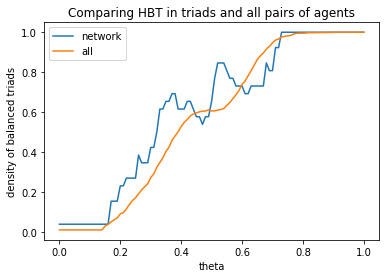

In [87]:
plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Comparing HBT in triads and all pairs of agents")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

# Randomizing triads in the whole network

In [45]:
def randomize_attributes(attr):
    N, A = attr.shape
    
    attr_copy = np.copy(attr)
    for i in range(0,A):
        np.random.shuffle(attr_copy[:,i])
    
    return attr_copy

def randomize_all_attributes(attr):
    attrs_copy = {}
    for sem in range(1,len(attr)+1):
        attrs_copy[sem] = randomize_attributes(attr[sem])
    return attrs_copy

def calc_pval_A8(triads, agents, th, attr_dif, M):
    """
    triads - list of sets of node ids forming a triad
    agents - array of vectors of agent attributes
    th - threshold used
    attr_dif - max difference between attributes
    M - number of times to repeat randomization
    """
    polarities = calc_link_polarities2(agents, th, attr_dif)
    bal_dens = balanced_triad_density_network(polarities, triads)
    
#     N = polarities.shape[0]
#     rho = np.sum(polarities == 1)/2 / N/(N-1)*2
    
    bal_dens_rands = np.zeros(M)
    
    for i in range(0,M):
        attr_copy = randomize_attributes(agents)
        polarities_rand = calc_link_polarities2(attr_copy, th, attr_dif)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
        
    pval = np.sum(bal_dens_rands >= bal_dens)
    
    return bal_dens_rands, bal_dens, pval

def compare_networks2(fun, data, th, attr_dif, M):
    pvals = np.zeros(6)
    vals = np.zeros(6)
    stds = np.zeros(6)
    difs = np.zeros(6)
    
    for n in range(1,7):
#         print(n)
        net = data[n]
        triads = get_triads(net)
        agents = dcor_attributes[n]
        
        bal_dens_rands, bal_dens, pval = fun(triads, agents, th, attr_dif, M)
        pvals[n-1] = pval
        vals[n - 1] = bal_dens
        difs[n-1] = np.mean(bal_dens - bal_dens_rands)
        stds[n-1] = np.std(difs)
    return pvals, vals, difs, stds

In [44]:
bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, dcor_attributes[sem], 0.5, 2, 100)

NameError: name 'compare_bal_triads' is not defined

In [90]:
np.sum(bal_dens_rands > bal_dens), np.mean(bal_dens_rands) - bal_dens, pval

(2, -0.21346153846153848, 2)

In [91]:
sem = 1
triads = get_triads(data[sem])

thetas = np.linspace(0,1,15)

bals = np.zeros(len(thetas))
rand_bals_mean = np.zeros(len(thetas))
rand_bals_std = np.zeros(len(thetas))
pvals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[sem], theta, max_dif3, 100)
    rand_bals_mean[i] = np.mean(rand_bal)
    rand_bals_std[i] = np.std(rand_bal)
    bals[i] = bal
    pvals[i] = pval


Text(0, 0.5, 'density of balanced triads')

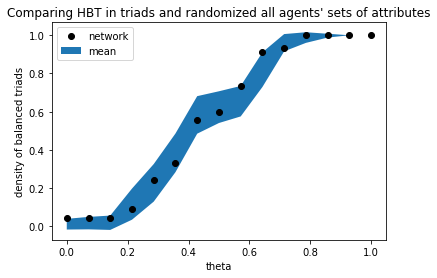

In [92]:
plt.plot(thetas, bals, 'ko')
# plt.plot(thetas, rand_bals_mean)
plt.fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized all agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [93]:
pvals, max_dif3

(array([ 6., 11., 13., 54., 31., 66., 60., 62., 11., 14., 69.,  0.,  0.,
         0.,  0.]),
 1.9498109791002052)

KeyboardInterrupt: 

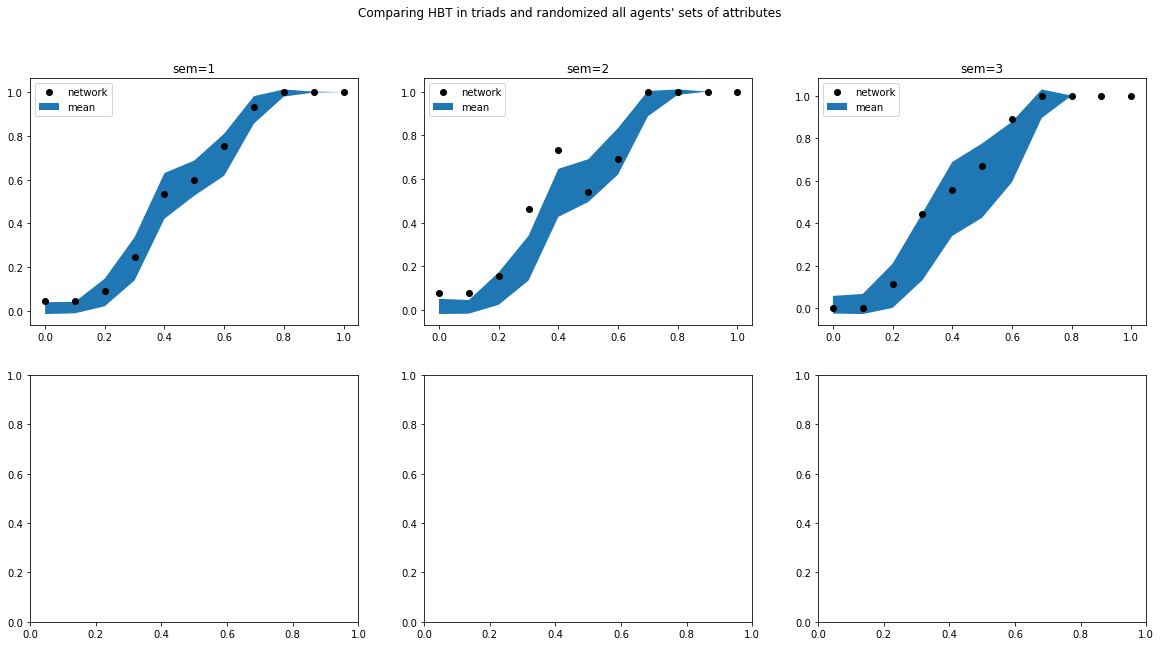

In [94]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,11)
pvals = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and randomized all agents' sets of attributes")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        triads = get_triads(data[semm])

        bals = np.zeros(len(thetas))
        rand_bals_mean = np.zeros(len(thetas))
        rand_bals_std = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[semm], theta, max_dif3, 100)
            rand_bals_mean[i] = np.mean(rand_bal)
            rand_bals_std[i] = np.std(rand_bal)
            bals[i] = bal
            pvals[semm][i] = pval
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
        axs[a1, a2].legend(["network", "mean"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
pvals

# Randomizing attributes only inside triads

In [ ]:
sem = 1
triads = get_triads(data[sem])

In [ ]:
from itertools import chain
triad_agents = np.unique(list(chain.from_iterable(triads)))
dcor_attributes[1][triad_agents];

In [ ]:
sem = 2
triads = get_triads(data[sem])
triad_agents = np.unique(list(chain.from_iterable(triads)))

thetas = np.linspace(0,1,11)

bals = np.zeros(len(thetas))
rand_bals_mean = np.zeros(len(thetas))
rand_bals_std = np.zeros(len(thetas))
pvals_t = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[sem], theta, max_dif3, 100, triad_agents)
    rand_bals_mean[i] = np.mean(rand_bal)
    rand_bals_std[i] = np.std(rand_bal)
    bals[i] = bal
    pvals_t[i] = pval

In [ ]:
plt.plot(thetas, bals, 'ko')
# plt.plot(thetas, rand_bals_mean)
plt.fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized triad agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [ ]:
pvals_t, triad_agents

In [ ]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,21)
pvals_t = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and randomized triad agents' sets of attributes")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        triads = get_triads(data[semm])
        triad_agents = np.unique(list(chain.from_iterable(triads)))

        bals = np.zeros(len(thetas))
        rand_bals_mean = np.zeros(len(thetas))
        rand_bals_std = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[semm], theta, max_dif3, 100, triad_agents)
            rand_bals_mean[i] = np.mean(rand_bal)
            rand_bals_std[i] = np.std(rand_bal)
            bals[i] = bal
            pvals_t[semm][i] = pval
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
        axs[a1, a2].legend(["network", "mean"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
pvals_t

In [ ]:
sem = 2
triads = get_triads(data[sem])
triad_agents = np.unique(list(chain.from_iterable(triads)))

In [ ]:
[len(np.unique(list(chain.from_iterable(get_triads(data[sem]))))) for sem in range(1,7)]

In [ ]:
[len(get_triads(data[sem])) for sem in range(1,7)]

# A8

In [97]:
dcor_attributes

{1: array([[-7.159e+00,  2.502e+00,  3.593e-01,  5.744e-02, -2.612e-02,
         -1.005e+00, -5.504e-01,  2.167e-01],
        [-4.933e+00,  1.363e+00,  1.878e+00, -7.064e-01, -1.754e-01,
         -7.996e-01,  1.976e-01, -2.698e-01],
        [-7.109e+00,  1.590e+00,  1.917e+00, -1.211e+00,  3.338e-01,
         -1.486e-01, -1.954e+00,  1.356e+00],
        [-7.049e+00, -6.162e-01, -1.344e-01, -7.948e-01, -9.967e-02,
          1.092e-01, -3.760e-01,  3.528e-01],
        [-6.184e+00,  9.057e-01, -7.857e-01, -1.135e+00, -2.140e-02,
          1.352e-01,  6.107e-02, -9.330e-02],
        [-3.516e+00,  9.684e-01,  1.402e+00,  4.949e-01,  8.168e-01,
          7.937e-01, -1.422e+00, -4.119e-01],
        [-3.705e+00,  8.201e-01, -2.163e-01, -2.858e-01, -2.783e-01,
         -1.039e+00, -1.035e+00, -4.892e-01],
        [-4.754e+00,  5.709e-01,  2.019e+00, -8.291e-01,  5.632e-01,
         -1.067e+00, -1.305e+00,  3.851e-01],
        [-7.224e+00,  7.578e-01,  6.111e-01,  7.370e-01,  3.183e-01,
        

## Similar analysis but with taking all terms together

In [54]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)
M = 100
disp_every = 0.2
generate_true_densities = True
saved = False

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Started analysis")

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len)

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
attr_rands_M = [randomize_all_attributes(dcor_attributes) for i in range(0,M)] 

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Finished randomization of attributes. ")

if generate_true_densities:
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]

        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]

    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(current_time, ". Finished calculating real-world balanced densities. ")

bal_dens_rands = np.zeros([M, len(thetas)])
disp_every_printer = disp_every
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = calc_link_polarities2(attr_rands_M[j][semm], theta)
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
    if (j+1) / M >= disp_every_printer:
        now = datetime.now()

        current_time = now.strftime("%H:%M:%S")
        print(current_time, ". Finished ", str(int((j+1)/M*100)), "% of randomized calculations.")
        disp_every_printer += disp_every
    
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print(current_time, ". Finished.")

bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

test_A8_all_agents_terms_together_thetas = thetas
test_A8_all_agents_terms_together_bal_dens = bal_dens
test_A8_all_agents_terms_together_bal_dens_rands = bal_dens_rands

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


09:48:58 . Started analysis
09:48:58 . Finished randomization of attributes. 
09:49:09 . Finished calculating real-world balanced densities. 
09:52:39 . Finished  20 % of randomized calculations.
09:56:10 . Finished  40 % of randomized calculations.
09:59:57 . Finished  61 % of randomized calculations.
10:03:18 . Finished  80 % of randomized calculations.
10:06:51 . Finished  100 % of randomized calculations.
10:06:51 . Finished.


(8415.0,
 array([8119., 7817., 7854., 7636., 7817., 7887., 7503., 7794., 8000.,
        7387., 7630., 7587., 7666., 7845., 7354., 7660., 7658., 7757.,
        7899., 7532., 7652., 7669., 7847., 7642., 7597., 8045., 7432.,
        7662., 7721., 7672., 7633., 7804., 7709., 7784., 7794., 7401.,
        7734., 7693., 7861., 7704., 7549., 7700., 7812., 7800., 7881.,
        7826., 7852., 7451., 7639., 7530., 7539., 8039., 7459., 7993.,
        8020., 7809., 7892., 7758., 7855., 7680., 7634., 7950., 7858.,
        8077., 7668., 7888., 8017., 7670., 7670., 7870., 7580., 8122.,
        7766., 7677., 7468., 7689., 7586., 7767., 7709., 7718., 7917.,
        7872., 7767., 7778., 7758., 7543., 7674., 7764., 7484., 8025.,
        7564., 7660., 7787., 7883., 7984., 7814., 7565., 7567., 7756.,
        7878.]))

In [55]:
#open, add and save
if not saved:
    with open('pca_a8_rand_results.pkl', 'rb') as file:

        # Call load method to deserialze
        old_data = pickle.load(file)



    test_A8_all_agents_terms_together_bal_dens_rands = np.concatenate((old_data[2], test_A8_all_agents_terms_together_bal_dens_rands))

    with open('pca_a8_rand_results.pkl', 'wb') as file:

        # A new file will be created
        pickle.dump((old_data[0], old_data[1], test_A8_all_agents_terms_together_bal_dens_rands), file) 
    saved = True

In [102]:
# #save, commented out not accidentally do it
# with open('pca_a8_rand_results.pkl', 'wb') as file:
      
#     # A new file will be created
#     pickle.dump((test_A8_all_agents_terms_together_thetas, test_A8_all_agents_terms_together_bal_dens, test_A8_all_agents_terms_together_bal_dens_rands), file)


In [56]:
#open
with open('pca_a8_rand_results.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    print(myvar)
test_A8_all_agents_terms_together_thetas, test_A8_all_agents_terms_together_bal_dens, test_E8_all_agents_terms_together_bal_dens_rands = myvar

bal_dens_sum = np.sum(test_A8_all_agents_terms_together_bal_dens)
bal_dens_rands_sum = np.array([np.sum(test_A8_all_agents_terms_together_bal_dens_rands[j]) for j in range(0,len(test_E8_all_agents_terms_together_bal_dens_rands))])


(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ]), array([0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051,
       0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.058, 0.058, 0.101,
       0.101, 0.109, 0.159, 0.159, 0.181, 0.188, 0.21 , 0.254, 0.29 ,
       0.297, 0.326, 0.341, 0.37 , 0.37 , 0.406, 0.442, 0.449, 0.507,
       0.493, 0.529, 0.565, 0.572, 0.63 ,

In [57]:
np.sum(bal_dens_sum > bal_dens_rands_sum ), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(1000, 1000)

In [108]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] > bal_dens[i])

pvals_T

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   4.,  12.,   8.,
        11.,  24.,  10.,  31.,  26.,  15.,  21.,   3.,   4.,  10.,  34.,
        37.,  32.,  46.,  61.,  30.,  92., 117.,  31.,  10.,  39.,  46.,
        46.,  42.,  12.,  32.,  40.,  38.,  45.,  53.,  62.,  78.,  87.,
        25.,  10.,   6.,   9.,  15.,   6.,  15.,   4.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.])

In [58]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(test_A8_all_agents_terms_together_bal_dens_rands[:,i] >= test_A8_all_agents_terms_together_bal_dens[i])

pvals_T

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   1.,   0.,   0.,
         0.,   1.,   3.,   2.,   0.,   0.,   2.,   9.,  14.,  52.,  41.,
        44., 102.,  38., 163., 122.,  75., 119.,  25.,  29.,  75., 194.,
       216., 185., 288., 330., 205., 562., 665., 256., 100., 253., 262.,
       233., 194.,  77., 178., 228., 219., 229., 295., 324., 410., 495.,
       153.,  53.,  31.,  39.,  85.,  42.,  87.,  41.,  17.,   4.,  12.,
        29.,  44.,  71., 107., 155., 202., 257., 332., 420., 503., 582.,
       653., 709., 765., 810., 842., 875., 894., 910., 935., 945., 959.,
       971., 977.])

In [59]:
[(theta, pval) for theta, pval in zip(thetas, pvals_T) if pval < 50]

[(0.0, 0.0),
 (0.01, 0.0),
 (0.02, 0.0),
 (0.03, 0.0),
 (0.04, 0.0),
 (0.05, 0.0),
 (0.06, 0.0),
 (0.07, 0.0),
 (0.08, 0.0),
 (0.09, 0.0),
 (0.1, 0.0),
 (0.11, 0.0),
 (0.12, 0.0),
 (0.13, 0.0),
 (0.14, 0.0),
 (0.15, 0.0),
 (0.16, 3.0),
 (0.17, 0.0),
 (0.18, 0.0),
 (0.19, 1.0),
 (0.2, 0.0),
 (0.21, 0.0),
 (0.22, 0.0),
 (0.23, 1.0),
 (0.24, 3.0),
 (0.25, 2.0),
 (0.26, 0.0),
 (0.27, 0.0),
 (0.28, 2.0),
 (0.29, 9.0),
 (0.3, 14.0),
 (0.32, 41.0),
 (0.33, 44.0),
 (0.35000000000000003, 38.0),
 (0.4, 25.0),
 (0.41000000000000003, 29.0),
 (0.68, 31.0),
 (0.6900000000000001, 39.0),
 (0.71, 42.0),
 (0.73, 41.0),
 (0.74, 17.0),
 (0.75, 4.0),
 (0.76, 12.0),
 (0.77, 29.0),
 (0.78, 44.0)]

Text(0, 0.5, 'density of balanced triads')

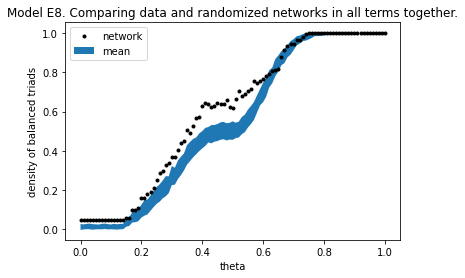

In [205]:
mean_vals = np.mean(np.array(test_E8_all_agents_terms_together_bal_dens_rands).T,1)
std_vals = np.std(np.array(test_E8_all_agents_terms_together_bal_dens_rands).T,1)

plt.plot(test_E8_all_agents_terms_together_thetas, test_E8_all_agents_terms_together_bal_dens, 'k.')

plt.fill_between(test_E8_all_agents_terms_together_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

Text(0, 0.5, 'density of balanced triads in all sems')

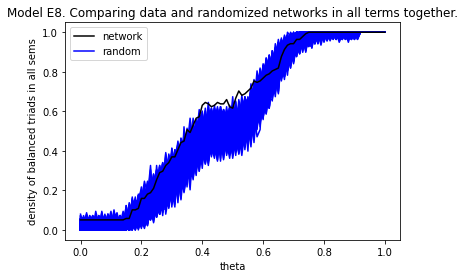

In [52]:
handles_rand = plt.plot(test_E8_all_agents_terms_together_thetas, np.array(test_E8_all_agents_terms_together_bal_dens_rands).T, 'b')
handles_net, = plt.plot(test_E8_all_agents_terms_together_thetas, test_E8_all_agents_terms_together_bal_dens, 'k')
# plt.legend(["network", "random"], handles = [handles_net, handles_rand[0]])
plt.legend([handles_net, handles_rand[0]], ["network", "random"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads in all sems")

In [58]:
first_sem = 2
last_sem = 6
thetas = np.linspace(0,1,101)
M = 1000

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len)

agents_len = [len(dcor_attributes[semm]) for semm in range(1,last_sem+1)]

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
attr_rands_M = [randomize_attribute_sets(dcor_attributes) for i in range(0,M)] 

rhos = np.zeros([last_sem - first_sem + 1, len(thetas)])

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(dcor_attributes[semm], theta)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
        N = polarities.shape[0]
        rhos[semm-first_sem, i] = np.sum(polarities == 1)/2 / N/(N-1)*2

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        N = agents_len[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = distribute_random_polarities(N, rhos[semm - first_sem, i])
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

test_E8_all_agents_terms_together_thetas2 = thetas
test_E8_all_agents_terms_together_bal_dens2 = bal_dens
test_E8_all_agents_terms_together_bal_dens_rands2 = bal_dens_rands

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(5799.0,
 array([5188., 5211., 5162., 5171., 5119., 5197., 5141., 5182., 5209.,
        5182., 5205., 5213., 5246., 5227., 5169., 5231., 5216., 5259.,
        5191., 5220., 5228., 5169., 5202., 5157., 5181., 5181., 5149.,
        5174., 5198., 5187., 5160., 5146., 5150., 5186., 5186., 5175.,
        5210., 5194., 5194., 5222., 5098., 5191., 5163., 5198., 5181.,
        5206., 5220., 5224., 5253., 5249., 5170., 5214., 5194., 5150.,
        5195., 5220., 5153., 5138., 5174., 5115., 5272., 5157., 5129.,
        5236., 5153., 5232., 5141., 5161., 5161., 5140., 5254., 5118.,
        5230., 5148., 5197., 5218., 5208., 5178., 5211., 5156., 5198.,
        5195., 5206., 5122., 5207., 5160., 5234., 5192., 5229., 5158.,
        5144., 5141., 5245., 5239., 5110., 5169., 5204., 5208., 5192.,
        5162., 5187., 5213., 5092., 5216., 5177., 5257., 5181., 5173.,
        5185., 5188., 5134., 5174., 5178., 5159., 5229., 5205., 5151.,
        5216., 5181., 5188., 5182., 5220., 5187., 5231., 5184., 5200

In [59]:
np.sum(bal_dens_sum > bal_dens_rands_sum ), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(1000, 1000)

In [60]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] >= bal_dens[i])

pvals_T

array([  44.,   51.,   43.,   33.,   51.,   40.,   42.,   39.,   38.,
         40.,   48.,   34.,   41.,   39.,   56.,  153.,  239.,   51.,
        106.,  140.,   15.,   32.,    9.,   27.,   18.,    8.,    1.,
          2.,    7.,    5.,    2.,    9.,   12.,    1.,    0.,    0.,
          0.,    1.,    0.,    1.,    0.,    1.,    0.,    1.,    1.,
          7.,    7.,    7.,    2.,   31.,   11.,    0.,    1.,    2.,
          7.,   13.,   22.,    8.,   51.,   79.,  197.,  370.,  708.,
        815.,  895.,  977.,  733.,  546.,  405.,  458.,  706.,  431.,
        537.,  274.,  379.,  408.,  561.,  689.,  732.,  819.,  802.,
        859.,  907.,  899.,  940.,  956.,  974.,  966.,  963.,  982.,
        983., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000.])

Text(0, 0.5, 'density of balanced triads')

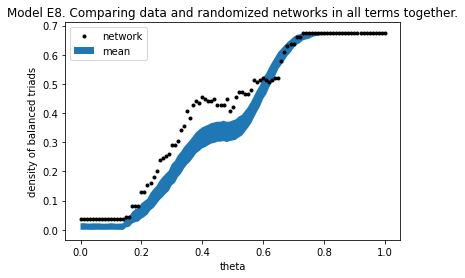

In [61]:
mean_vals = np.mean(np.array(test_E8_all_agents_terms_together_bal_dens_rands2).T,1)
std_vals = np.std(np.array(test_E8_all_agents_terms_together_bal_dens_rands2).T,1)

plt.plot(test_E8_all_agents_terms_together_thetas2, test_E8_all_agents_terms_together_bal_dens2, 'k.')

plt.fill_between(test_E8_all_agents_terms_together_thetas2, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

# Sum of ranks analysis

Let's calculate a rank for a given threshold for each series for randomized datasets and let's what is the distribution of these values. Is it normal?

What is the prob. that the sum of ranks for RL dataset is larger than for randomized datasets? 

In [60]:
def calc_rank(vals, val):
    """
    Includes val in vals array sorts it and calculates rank for the val.
    """
    all_vals = np.append(vals, val)
    
    all_ranks = stats.rankdata(all_vals)
    return all_ranks[-1]

def calc_ranks(vals, val = []):
    """
    Calculated ranks and allows to include one more value. 
    """
    all_vals = np.append(vals, val)
    
    all_ranks = stats.rankdata(all_vals)
    if np.isscalar(val):
        return all_ranks[0:-1], all_ranks[-1]
    else:
        return all_ranks, []

def get_important_theta_values(thetas, bal_dens_rands, bal_dens = [], distances = [i/16 for i in range(0,16)]):
    """
    There are only 16 (17) distinct thetas. So we do not need all the values. 
    """
    pds = np.array([bal_dens[np.where(thetas >= distances[i])[0][0]] for i in range(0, len(distances))])
    rds = np.array([[bal_dens_rands[j][np.where(thetas >= distances[i])[0][0]] for i in range(0, len(distances))] for j in range(0, len(bal_dens_rands))])
    return pds, rds

def calc_ranks_thetas(bal_dens_rands, bal_dens = []):
    M, num_thetas = bal_dens_rands.shape
#     print(M); 
#     print(num_thetas)
    rl_rank = np.zeros(num_thetas)
    rand_ranks = np.zeros([num_thetas, M])
    
    for theta_ind in range(0, num_thetas):
        vals = [bal_dens_rands[i][theta_ind] for i in range(0, M)]
        if len(bal_dens) > 0:
            val = bal_dens[theta_ind]
        else:
            val = []
        
        rand_ranks[theta_ind], rl_rank[theta_ind] = calc_ranks(vals, val)
    return rand_ranks, rl_rank


In [62]:
test_A8_all_agents_terms_together_bal_dens_rands

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [64]:
distances = [i/16 for i in range(0,16)]
distances = test_A8_all_agents_terms_together_thetas
pds = np.array([test_A8_all_agents_terms_together_bal_dens[np.where(test_A8_all_agents_terms_together_thetas >= distances[i])[0][0]] for i in range(0, len(distances))])
rds = np.array([[test_A8_all_agents_terms_together_bal_dens_rands[j][np.where(test_A8_all_agents_terms_together_thetas >= distances[i])[0][0]] for i in range(0, len(distances))] for j in range(0, len(test_A8_all_agents_terms_together_bal_dens_rands))])


In [67]:
vals = [rds[i][0] for i in range(0, len(rds))]
val = pds[0]

calc_ranks(vals, val)

(array([500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
        500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5, 500.5,
      

In [68]:
rds

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [69]:
rand_ranks, rl_rank = calc_ranks_thetas(rds, pds)

In [70]:
sums = np.sum(rand_ranks,0)

/home/pgorski/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


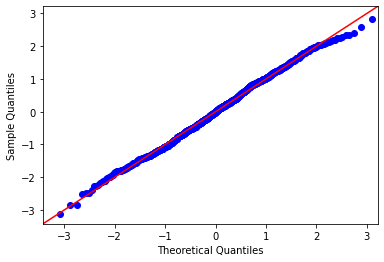

In [71]:

sm.qqplot((sums - np.mean(sums)) / np.std(sums), line ='45')
py.show()

In [72]:

stats.shapiro(sums)

ShapiroResult(statistic=0.9966294765472412, pvalue=0.03091501258313656)

In [73]:
np.sum(sums < np.sum(rl_rank)), sums, np.sum(rl_rank)

(1000,
 array([61320. , 63757. , 39861. , 31034.5, 49293.5, 38740.5, 27010. ,
        65712.5, 43286.5, 56123.5, 37365. , 70130.5, 41215. , 64006.5,
        53551. , 64702. , 44681.5, 48288.5, 49732.5, 45614. , 48952.5,
        60550. , 43671. , 43068.5, 53559.5, 38064.5, 46285.5, 51003. ,
        49191. , 34431.5, 46826. , 67260. , 73633.5, 52325.5, 32528. ,
        38315.5, 71077.5, 50620.5, 45740. , 50133. , 39483. , 74227.5,
        64803.5, 47749. , 56753. , 66813. , 38808. , 31902. , 52937.5,
        45381. , 77832.5, 52997.5, 37656.5, 57016. , 65597. , 50960.5,
        50682. , 38502.5, 44994. , 42827. , 62650. , 36998.5, 39572.5,
        39373.5, 44523.5, 36003. , 47959.5, 48416. , 37607. , 44508. ,
        63630.5, 37352. , 33706.5, 36271. , 46469. , 60367. , 70678.5,
        64594.5, 41464.5, 36925.5, 59766. , 44980. , 55720. , 40467. ,
        60504. , 33947.5, 46659.5, 54283.5, 44612. , 41778. , 69173.5,
        47652. , 45092. , 56593. , 36806. , 57044. , 38241. , 65377.5,

In [74]:
np.max(sums)

80394.0

In [75]:
# pvalue:
1-np.sum(sums < np.sum(rl_rank))/len(sums)

0.0

In [76]:
rl_sum = np.sum(rl_rank)
zscore = (rl_sum - np.mean(sums)) / np.std(sums)

1-stats.norm.cdf(zscore)

0.0002652575928272505

In [77]:
triads_len

[45, 26, 9, 26, 20, 12]